## **Importing Libraries**

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

# **Stage 1**

## **Data Setup and Preview**

In [5]:
data_path = Path.home()/'notebooks/programming/data/watch_bot'
csv_path = Path.home()/'notebooks/programming/projects/watch_bot/data_prep/dial_visibility_labels_2.csv'

In [6]:
df = pd.read_csv(csv_path)
df

,dial_visibility,image_quality,image_size_x,image_size_y,like,name
0,1.0,1.0,960,960,1.0,nomos_1/nomos/_without_model/nomos_@_the_loupe...
1,1.0,1.0,960,960,0.0,nomos_1/nomos/_without_model/nomos_@_the_loupe...
2,0.0,0.0,960,960,0.0,nomos_1/nomos/_without_model/nomos_@_the_loupe...
3,1.0,1.0,720,960,0.0,nomos_1/nomos/_without_model/nomos_beta_11156_...
4,1.0,1.0,720,960,0.0,nomos_1/nomos/_without_model/nomos_beta_11156_...
...,...,...,...,...,...,...
29110,1.0,-1.0,960,960,-1.0,chrono24_dial_visibility_most_uncertain/zenith...
29111,1.0,-1.0,960,960,-1.0,chrono24_dial_visibility_most_uncertain/zenith...
29112,0.0,-1.0,767,960,-1.0,chrono24_dial_visibility_most_uncertain/zenith...
29113,0.0,-1.0,720,960,-1.0,chrono24_dial_visibility_most_uncertain/zenith...


In [7]:
df = pd.read_csv(csv_path)
df = df[['name', 'dial_visibility']]
df = df.astype({'dial_visibility':'int'})
df.head(), df.dtypes

(                                                name  dial_visibility
 0  nomos_1/nomos/_without_model/nomos_@_the_loupe...                1
 1  nomos_1/nomos/_without_model/nomos_@_the_loupe...                1
 2  nomos_1/nomos/_without_model/nomos_@_the_loupe...                0
 3  nomos_1/nomos/_without_model/nomos_beta_11156_...                1
 4  nomos_1/nomos/_without_model/nomos_beta_11156_...                1,
 name               object
 dial_visibility     int64
 dtype: object)

In [28]:
np.random.seed(13)
bs = 64
image_size = 128
xform = get_transforms(flip_vert=True, max_lighting=0.4, max_warp=0.1)

In [29]:
src = (ImageList.from_df(df, data_path)
        .split_by_rand_pct()
        .label_from_df())

In [30]:
data = (src.transform(tfms=xform, size=image_size)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [31]:
data

ImageDataBunch;

Train: LabelList (23292 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
1,1,0,1,1
Path: /home/neronicolo/notebooks/programming/data/watch_bot;

Valid: LabelList (5823 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
0,1,0,1,0
Path: /home/neronicolo/notebooks/programming/data/watch_bot;

Test: None

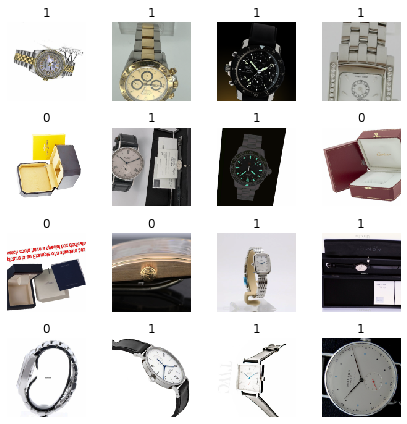

In [32]:
data.show_batch(rows=4, figsize=(6,6))

## **Training**

In [33]:
learn = create_cnn(data, models.resnet50, metrics=[accuracy])
learn = learn.to_fp16()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


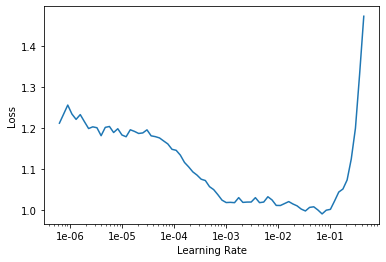

In [34]:
learn.lr_find()
learn.recorder.plot()

In [41]:
learn.fit_one_cycle(5, slice(3e-04))

epoch,train_loss,valid_loss,accuracy,time
0,0.221887,0.198465,0.917568,02:43
1,0.219013,0.195952,0.919457,02:43
2,0.214764,0.193626,0.919973,02:42
3,0.212865,0.191425,0.920659,02:42
4,0.199930,0.189827,0.922549,02:41


In [42]:
learn.save('stage_1')

## **Interpreting**

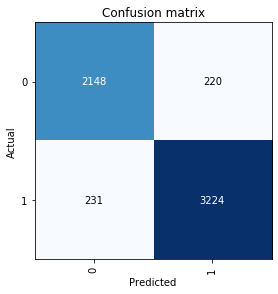

In [43]:
learn.load('stage_1')
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [24]:
losses, idxs = interp.top_losses()
len(losses) == len(idxs) == len(data.valid_ds)

True

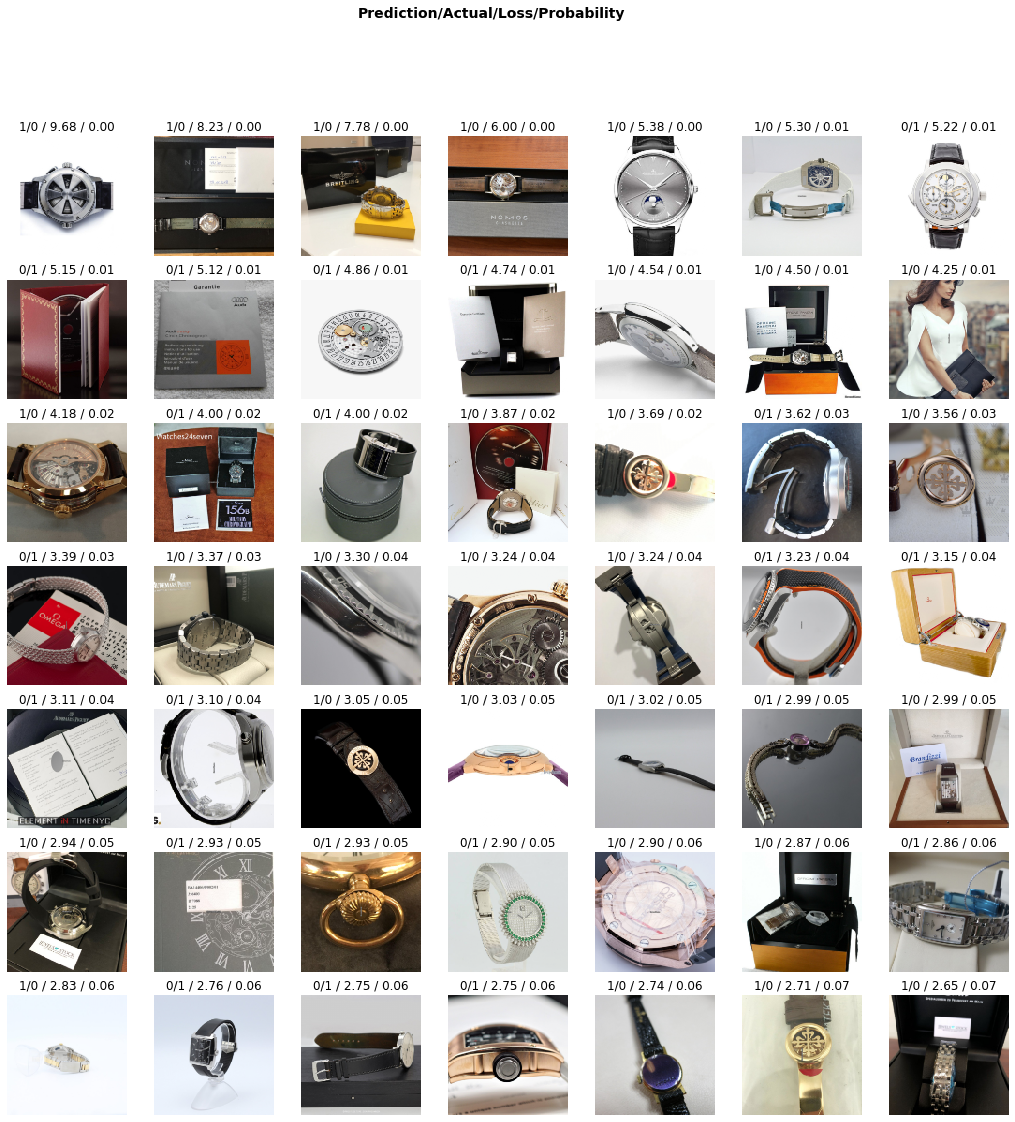

In [25]:
interp.plot_top_losses(49, figsize=(18,18))

In [29]:
idx = idxs[:40]
idx

tensor([4916, 1172, 4851, 4967, 4688, 1456, 1382, 4515, 1199, 5616, 3544, 3863,
        3215, 4718, 1003, 3368, 1339,  557, 3865, 2535, 1175, 2629, 4741, 1524,
        1143, 2226, 2645,  246, 1500, 3612, 5309, 4434, 5594, 1793, 2530,  272,
        4061, 3429, 4687, 3466])